# CREDIT FRAUD ANALYSIS USING PYTHON

## Synopsis

## Packages Used

In [1]:
# data analysis and wrangling
import arff
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

## Creating a dataframe from arff file

In [2]:
#load the data in arff file as list
list_data = list(arff.load('/Users/admin/Documents/Documents/JLU/3rd Sem/Project/credit_fruad.arff'))
#convert the list into dataframe
df = pd.DataFrame(list_data)
#have a look at the first 3 rows of the dataframe
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,'<0',6.0,'critical/other existing credit',radio/tv,1169.0,'no known savings','>=7',4.0,'male single',none,...,'real estate',67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,'0<=X<200',48.0,'existing paid',radio/tv,5951.0,'<100','1<=X<4',2.0,'female div/dep/mar',none,...,'real estate',22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,'no checking',12.0,'critical/other existing credit',education,2096.0,'<100','4<=X<7',2.0,'male single',none,...,'real estate',49.0,none,own,1.0,'unskilled resident',2.0,none,yes,good


In [3]:
#know the dimensions of the dataframe created
df.shape

(1000, 21)

In [4]:
#create a list with the names of columns to be given to the dataframe
names = ["over_draft", "credit_usage", "credit_history", "purpose", "current_balance", "Average_Credit_Balance", "employment", "location", "personal_status", "other_parties", "residence_since", "property_magnitude", "cc_age", "other_payment_plans", "housing", "existing_credits", "job", "num_dependents", "own_telephone", "foreign_worker", "class"]

In [5]:
#assign the list of column names to the dataframe
df.columns = names
#have a look at the changes made to the dataframe
df.head(1)

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,...,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6.0,'critical/other existing credit',radio/tv,1169.0,'no known savings','>=7',4.0,'male single',none,...,'real estate',67.0,none,own,2.0,skilled,1.0,yes,yes,good


In [6]:
#know the distribution of class variable as to how many loan applicants are good and how many are bad
df['class'].value_counts()

good    700
bad     300
Name: class, dtype: int64

In [7]:
#know the details of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
over_draft                1000 non-null object
credit_usage              1000 non-null float64
credit_history            1000 non-null object
purpose                   1000 non-null object
current_balance           1000 non-null float64
Average_Credit_Balance    1000 non-null object
employment                1000 non-null object
location                  1000 non-null float64
personal_status           1000 non-null object
other_parties             1000 non-null object
residence_since           1000 non-null float64
property_magnitude        1000 non-null object
cc_age                    1000 non-null float64
other_payment_plans       1000 non-null object
housing                   1000 non-null object
existing_credits          1000 non-null float64
job                       1000 non-null object
num_dependents            1000 non-null float64
own_telephone             1000 non-null o

This tells us there are no null values in our dataset. If there were missing values, we would have to assign dummy values in order to have a complete dataframe. Otherwise the tests cannot be applied for analysis when there are NaN values.

## checking for categories existing in numerical variables

In [8]:
df['credit_usage'].nunique()
#this is a continuous variable

33

In [9]:
df['current_balance'].nunique()
# This variable is not very useful because average_credit_balance variable already exists

921

In [10]:
#deleting the 'current_balance' column
df.drop('current_balance',axis=1,inplace=True)

In [11]:
print(df['location'].nunique())
df['location'].value_counts()
# There exists a category here with values [1,2,3,4]

4


4.0    476
2.0    231
3.0    157
1.0    136
Name: location, dtype: int64

In [12]:
print(df['residence_since'].nunique())
df['residence_since'].value_counts()
# There exists a category here with values [1,2,3,4] 

4


4.0    413
2.0    308
3.0    149
1.0    130
Name: residence_since, dtype: int64

In [13]:
df['cc_age'].nunique()
#this is a continuous variable

53

In [14]:
print(df['existing_credits'].nunique())
df['existing_credits'].value_counts()
# There exists a category here with values [1,2,3,4]

4


1.0    633
2.0    333
3.0     28
4.0      6
Name: existing_credits, dtype: int64

In [15]:
print(df['num_dependents'].nunique())
df['num_dependents'].value_counts()
# There exists a category here with values [1,2]

2


1.0    845
2.0    155
Name: num_dependents, dtype: int64

## Changing class variable from text to numerical categories

We change the class variable as 0 = good and 1 = bad using if statement inside function and then apply command.

In [16]:
df["class"].unique()

array(['good', 'bad'], dtype=object)

In [17]:
def if_func14 (row):
        c = row['class']
        if c == 'good':
            return 0
        else:
            return 1

In [18]:
df["class"] = df.apply(if_func14, axis = "columns")

## Converting categorical variables to numerical values

In [19]:
#making a copy of the dataframe to convert it into numeric values for categories
df_num = df.copy()

### over_draft

In [20]:
df_num["over_draft"].unique()

array(["'<0'", "'0<=X<200'", "'no checking'", "'>=200'"], dtype=object)

In [21]:
def if_func1 (row):
        od = row['over_draft']
        if od == "'no checking'":
            return 1
        elif od == "'<0'":
            return 2
        elif od == "'0<=X<200'":
            return 3
        else:
            return 4

In [22]:
df_num["over_draft"] = df_num.apply(if_func1, axis = "columns")

### credit_history

In [23]:
df_num["credit_history"].unique()

array(["'critical/other existing credit'", "'existing paid'",
       "'delayed previously'", "'no credits/all paid'", "'all paid'"], dtype=object)

In [24]:
def if_func2 (row):
        ch = row['credit_history']
        if ch == "'no credits/all paid'":
            return 1
        elif ch == "'all paid'":
            return 2
        elif ch == "'existing paid'":
            return 3
        elif ch == "'delayed previously'":
            return 4
        else:
            return 5

In [25]:
df_num["credit_history"] = df_num.apply(if_func2, axis = "columns")

### purpose

In [26]:
df_num["purpose"].unique()

array(['radio/tv', 'education', 'furniture/equipment', "'new car'",
       "'used car'", 'business', "'domestic appliance'", 'repairs',
       'other', 'retraining'], dtype=object)

In [27]:
def if_func3 (row):
        pr = row['purpose']
        if pr == "radio/tv":
            return 1
        elif pr == "education":
            return 2
        elif pr == "furniture/equipment":
            return 3
        elif pr == "'new car'":
            return 4
        elif pr == "'used car'":
            return 5
        elif pr == "business":
            return 6
        elif pr == "'domestic appliance'":
            return 7
        elif pr == "repairs":
            return 8
        elif pr == "retraining":
            return 9
        else:
            return 10

In [28]:
df_num["purpose"] = df_num.apply(if_func3, axis = "columns")

### Average_Credit_Balance

In [29]:
df_num["Average_Credit_Balance"].unique()

array(["'no known savings'", "'<100'", "'500<=X<1000'", "'>=1000'",
       "'100<=X<500'"], dtype=object)

In [30]:
def if_func4 (row):
        acb = row['Average_Credit_Balance']
        if acb == "'<100'":
            return 1
        elif acb == "'100<=X<500'":
            return 2
        elif acb == "'500<=X<1000'":
            return 3
        elif acb == "'>=1000'":
            return 4
        else:
            return 5

In [31]:
df_num["Average_Credit_Balance"] = df_num.apply(if_func4, axis = "columns")

### employment

In [32]:
df_num["employment"].unique()

array(["'>=7'", "'1<=X<4'", "'4<=X<7'", 'unemployed', "'<1'"], dtype=object)

In [33]:
def if_func5 (row):
        ep = row['employment']
        if ep == "'<1'":
            return 1
        elif ep == "'1<=X<4'":
            return 2
        elif ep == "'4<=X<7'":
            return 3
        elif ep == "'>=7'":
            return 4
        else:
            return 5

In [34]:
df_num["employment"] = df_num.apply(if_func5, axis = "columns")

### personal_status

In [35]:
df_num["personal_status"].unique()

array(["'male single'", "'female div/dep/mar'", "'male div/sep'",
       "'male mar/wid'"], dtype=object)

In [36]:
def if_func6 (row):
        ps = row['personal_status']
        if ps == "'female div/dep/mar'":
            return 1
        elif ps == "'male single'":
            return 2
        elif ps == "'male mar/wid'":
            return 3
        else:
            return 4

In [37]:
df_num["personal_status"] = df_num.apply(if_func6, axis = "columns")

### other_parties

In [38]:
df_num["other_parties"].unique()

array(['none', 'guarantor', "'co applicant'"], dtype=object)

In [39]:
def if_func7 (row):
        op = row['other_parties']
        if op == 'guarantor':
            return 1
        elif op == "'co applicant'":
            return 2
        else:
            return 3

In [40]:
df_num["other_parties"] = df_num.apply(if_func7, axis = "columns")

### property_magnitude

In [41]:
df_num["property_magnitude"].unique()

array(["'real estate'", "'life insurance'", "'no known property'", 'car'], dtype=object)

In [42]:
def if_func8 (row):
        pm = row['property_magnitude']
        if pm == 'car':
            return 1
        elif pm == "'life insurance'":
            return 2
        elif pm == "'real estate'":
            return 3
        else:
            return 4

In [43]:
df_num["property_magnitude"] = df_num.apply(if_func8, axis = "columns")

### other_payment_plans

In [44]:
df_num["other_payment_plans"].unique()

array(['none', 'bank', 'stores'], dtype=object)

In [45]:
def if_func9 (row):
        opp = row['other_payment_plans']
        if opp == 'bank':
            return 1
        elif opp == 'stores':
            return 2
        else:
            return 3

In [46]:
df_num["other_payment_plans"] = df_num.apply(if_func9, axis = "columns")

### housing

In [47]:
df_num["housing"].unique()

array(['own', "'for free'", 'rent'], dtype=object)

In [48]:
def if_func10 (row):
        h = row['housing']
        if h == 'own':
            return 1
        elif h == 'rent':
            return 2
        else:
            return 3

In [49]:
df_num["housing"] = df_num.apply(if_func10, axis = "columns")

### job

In [50]:
df_num["job"].unique()

array(['skilled', "'unskilled resident'", "'high qualif/self emp/mgmt'",
       "'unemp/unskilled non res'"], dtype=object)

In [51]:
def if_func11 (row):
        j = row['job']
        if j == "'unemp/unskilled non res'":
            return 1
        elif j == "'unskilled resident'":
            return 2
        elif j == 'skilled':
            return 3
        else:
            return 4

In [52]:
df_num["job"] = df_num.apply(if_func11, axis = "columns")

### own_telephone

In [53]:
df_num["own_telephone"].unique()

array(['yes', 'none'], dtype=object)

In [54]:
def if_func12 (row):
        ot = row['own_telephone']
        if ot == 'yes':
            return 0
        else:
            return 1

In [55]:
df_num["own_telephone"] = df_num.apply(if_func12, axis = "columns")

### foreign_worker

In [56]:
df_num["foreign_worker"].unique()

array(['yes', 'no'], dtype=object)

In [57]:
def if_func13 (row):
        fw = row['foreign_worker']
        if fw == 'no':
            return 0
        else:
            return 1

In [58]:
df_num["foreign_worker"] = df_num.apply(if_func13, axis = "columns")

## Changing specific columns to category data type

In [59]:
df_num.columns

Index(['over_draft', 'credit_usage', 'credit_history', 'purpose',
       'Average_Credit_Balance', 'employment', 'location', 'personal_status',
       'other_parties', 'residence_since', 'property_magnitude', 'cc_age',
       'other_payment_plans', 'housing', 'existing_credits', 'job',
       'num_dependents', 'own_telephone', 'foreign_worker', 'class'],
      dtype='object')

In [60]:
for col in ['over_draft', 'credit_history', 'purpose',
       'Average_Credit_Balance', 'employment', 'location',
       'personal_status', 'other_parties', 'residence_since',
       'property_magnitude', 'other_payment_plans', 'housing',
       'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class']:
    df_num[col] = df_num[col].astype('category')

In [61]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
over_draft                1000 non-null category
credit_usage              1000 non-null float64
credit_history            1000 non-null category
purpose                   1000 non-null category
Average_Credit_Balance    1000 non-null category
employment                1000 non-null category
location                  1000 non-null category
personal_status           1000 non-null category
other_parties             1000 non-null category
residence_since           1000 non-null category
property_magnitude        1000 non-null category
cc_age                    1000 non-null float64
other_payment_plans       1000 non-null category
housing                   1000 non-null category
existing_credits          1000 non-null category
job                       1000 non-null category
num_dependents            1000 non-null category
own_telephone             1000 non-null category
foreign_worker

## Splitting test and train df_num

train_df, test_df = train_test_split(df_num, test_size=0.2)

train_df.to_csv('/Users/admin/Documents/Documents/JLU/3rd Sem/Project/train.csv')

test_df.to_csv('/Users/admin/Documents/Documents/JLU/3rd Sem/Project/test.csv')

## What is the distribution of categorical features?

In [62]:
a = df.describe(include='all')
a

,over_draft,credit_usage,credit_history,purpose,Average_Credit_Balance,employment,location,personal_status,other_parties,residence_since,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
count,1000,1000.000000,1000,1000,1000,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000.000000
unique,4,NaN,5,10,5,5,NaN,4,3,NaN,4,NaN,3,3,NaN,4,NaN,2,2,NaN
top,'no checking',NaN,'existing paid',radio/tv,'<100','1<=X<4',NaN,'male single',none,NaN,car,NaN,none,own,NaN,skilled,NaN,none,yes,NaN
freq,394,NaN,530,280,603,339,NaN,548,907,NaN,332,NaN,814,713,NaN,630,NaN,596,963,NaN
mean,NaN,20.903000,NaN,NaN,NaN,NaN,2.973000,NaN,NaN,2.845000,NaN,35.546000,NaN,NaN,1.407000,NaN,1.155000,NaN,NaN,0.300000
std,NaN,12.058814,NaN,NaN,NaN,NaN,1.118715,NaN,NaN,1.103718,NaN,11.375469,NaN,NaN,0.577654,NaN,0.362086,NaN,NaN,0.458487
min,NaN,4.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,0.000000
25%,NaN,12.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,2.000000,NaN,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,0.000000
50%,NaN,18.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,3.000000,NaN,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,0.000000
75%,NaN,24.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,4.000000,NaN,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN,1.000000


In [63]:
a.loc['%',:] = a.loc['freq',:]/a.loc['count',:]*100

In [64]:
a

,over_draft,credit_usage,credit_history,purpose,Average_Credit_Balance,employment,location,personal_status,other_parties,residence_since,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
count,1000,1000.000000,1000,1000,1000,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000.000000
unique,4,NaN,5,10,5,5,NaN,4,3,NaN,4,NaN,3,3,NaN,4,NaN,2,2,NaN
top,'no checking',NaN,'existing paid',radio/tv,'<100','1<=X<4',NaN,'male single',none,NaN,car,NaN,none,own,NaN,skilled,NaN,none,yes,NaN
freq,394,NaN,530,280,603,339,NaN,548,907,NaN,332,NaN,814,713,NaN,630,NaN,596,963,NaN
mean,NaN,20.903000,NaN,NaN,NaN,NaN,2.973000,NaN,NaN,2.845000,NaN,35.546000,NaN,NaN,1.407000,NaN,1.155000,NaN,NaN,0.300000
std,NaN,12.058814,NaN,NaN,NaN,NaN,1.118715,NaN,NaN,1.103718,NaN,11.375469,NaN,NaN,0.577654,NaN,0.362086,NaN,NaN,0.458487
min,NaN,4.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,0.000000
25%,NaN,12.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,2.000000,NaN,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,0.000000
50%,NaN,18.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,3.000000,NaN,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,0.000000
75%,NaN,24.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,4.000000,NaN,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN,1.000000


## Analyzing by pivoting features

Now we analyze all the categorical variables, one by one, to know the proportion of bad creditors within each category. We do this by using the groupby command and we take out the mean. This is possible because we have given the value for bad creditors as 1 and good creditors as 0. The reason for keeping bad creditors as 1 and not good creditors as 1 is because we are intrested in analysing and predicting the defaulters from our data. So through this command, the sum of bad creditors within a particular category are divided with the total count of good and bad creditors in that category.

In [65]:
#over_draft
df[['over_draft', 'class']].groupby(['over_draft'], as_index=False).mean().sort_values(by='class', ascending=False)

,over_draft,class
1,'<0',0.492701
0,'0<=X<200',0.390335
2,'>=200',0.222222
3,'no checking',0.116751


In [66]:
#credit_history
df[['credit_history', 'class']].groupby(['credit_history'], as_index=False).mean().sort_values(by='class', ascending=False)

,credit_history,class
4,'no credits/all paid',0.625000
0,'all paid',0.571429
3,'existing paid',0.318868
2,'delayed previously',0.318182
1,'critical/other existing credit',0.170648


In [67]:
#purpose
df[['purpose', 'class']].groupby(['purpose'], as_index=False).mean().sort_values(by='class', ascending=False)

,purpose,class
4,education,0.440000
6,other,0.416667
1,'new car',0.380342
8,repairs,0.363636
3,business,0.350515
0,'domestic appliance',0.333333
5,furniture/equipment,0.320442
7,radio/tv,0.221429
2,'used car',0.165049
9,retraining,0.111111


In [68]:
#Average_Credit_Balance
df[['Average_Credit_Balance', 'class']].groupby(['Average_Credit_Balance'], as_index=False).mean().sort_values(by='class', ascending=False)

,Average_Credit_Balance,class
2,'<100',0.359867
0,'100<=X<500',0.330097
4,'no known savings',0.174863
1,'500<=X<1000',0.174603
3,'>=1000',0.125000


In [69]:
#employment
df[['employment', 'class']].groupby(['employment'], as_index=False).mean().sort_values(by='class', ascending=False)

,employment,class
2,'<1',0.406977
4,unemployed,0.370968
0,'1<=X<4',0.306785
3,'>=7',0.252964
1,'4<=X<7',0.224138


In [70]:
#location
df[['location', 'class']].groupby(['location'], as_index=False).mean().sort_values(by='class', ascending=False)

,location,class
3,4.0,0.334034
2,3.0,0.286624
1,2.0,0.268398
0,1.0,0.250000


In [71]:
#personal_status
df[['personal_status', 'class']].groupby(['personal_status'], as_index=False).mean().sort_values(by='class', ascending=False)

,personal_status,class
1,'male div/sep',0.400000
0,'female div/dep/mar',0.351613
2,'male mar/wid',0.271739
3,'male single',0.266423


In [72]:
#other_parties
df[['other_parties', 'class']].groupby(['other_parties'], as_index=False).mean().sort_values(by='class', ascending=False)

,other_parties,class
0,'co applicant',0.439024
2,none,0.299890
1,guarantor,0.192308


In [73]:
#residence_since
df[['residence_since', 'class']].groupby(['residence_since'], as_index=False).mean().sort_values(by='class', ascending=False)

,residence_since,class
1,2.0,0.314935
3,4.0,0.300242
2,3.0,0.288591
0,1.0,0.276923


In [74]:
#property_magnitude
df[['property_magnitude', 'class']].groupby(['property_magnitude'], as_index=False).mean().sort_values(by='class', ascending=False)

,property_magnitude,class
1,'no known property',0.435065
3,car,0.307229
0,'life insurance',0.306034
2,'real estate',0.212766


In [75]:
#other_payment_plans
df[['other_payment_plans', 'class']].groupby(['other_payment_plans'], as_index=False).mean().sort_values(by='class', ascending=False)

,other_payment_plans,class
0,bank,0.410072
2,stores,0.404255
1,none,0.275184


In [76]:
#housing
df[['housing', 'class']].groupby(['housing'], as_index=False).mean().sort_values(by='class', ascending=False)

,housing,class
0,'for free',0.407407
2,rent,0.391061
1,own,0.260870


In [77]:
#existing_credits
df[['existing_credits', 'class']].groupby(['existing_credits'], as_index=False).mean().sort_values(by='class', ascending=False)

,existing_credits,class
3,4.0,0.333333
0,1.0,0.315956
1,2.0,0.276276
2,3.0,0.214286


In [78]:
#job
df[['job', 'class']].groupby(['job'], as_index=False).mean().sort_values(by='class', ascending=False)

,job,class
0,'high qualif/self emp/mgmt',0.344595
1,'unemp/unskilled non res',0.318182
3,skilled,0.295238
2,'unskilled resident',0.280000


In [79]:
#num_dependents
df[['num_dependents', 'class']].groupby(['num_dependents'], as_index=False).mean().sort_values(by='class', ascending=False)

,num_dependents,class
0,1.0,0.300592
1,2.0,0.296774


In [80]:
#own_telephone
df[['own_telephone', 'class']].groupby(['own_telephone'], as_index=False).mean().sort_values(by='class', ascending=False)

,own_telephone,class
0,none,0.313758
1,yes,0.279703


In [81]:
#foreign_worker
df[['foreign_worker', 'class']].groupby(['foreign_worker'], as_index=False).mean().sort_values(by='class', ascending=False)

,foreign_worker,class
1,yes,0.307373
0,no,0.108108


Few important obervations :
Variables like credit_history, employment, other_parties, property_magnitude and foriegn_worker seem to have more impact on the class for few categories within the variable than others. So prediction must be made according to these variables.

## Analysis taking all the variables

In [82]:
train = pd.read_csv('/Users/admin/Documents/Documents/JLU/3rd Sem/Project/train.csv')

In [83]:
test = pd.read_csv('/Users/admin/Documents/Documents/JLU/3rd Sem/Project/test.csv')

In [84]:
train.drop('Unnamed: 0',axis=1,inplace=True)

In [85]:
test.drop('Unnamed: 0',axis=1,inplace=True)

In [86]:
test.shape

(200, 20)

In [87]:
X_train = train.drop("class", axis=1)
Y_train = train["class"]
X_test  = test.drop("class", axis=1)
Y_test = test["class"]
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((800, 19), (800,), (200, 19), (200,))

In [88]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred_logi = logreg.predict(X_test)
print(logreg.coef_)
print(logreg.intercept_)

[[ 0.28463312  0.03377331 -0.43154865  0.01810301 -0.31258964 -0.14447055
   0.26291386  0.02705024  0.17809431  0.06469972 -0.03207267 -0.00972981
  -0.32597796  0.26655466  0.13763808 -0.02836999  0.16751143  0.19545118
   0.37313506]]
[-1.23402706]


In [89]:
cm_logi = pd.crosstab(Y_test, Y_pred_logi, rownames=['True'], colnames=['Predicted'], margins=True)
cm_logi

Predicted,0,1,All
True,,,
0,132,4,136
1,44,20,64
All,176,24,200


In [90]:
cost_logi = cm_logi.iloc[1,0]*5 + cm_logi.iloc[0,1]*1
cost_logi

224

In [91]:
# Decision Tree

decision_tree = DecisionTreeClassifier(random_state=100)
decision_tree.fit(X_train, Y_train)
Y_pred_deci = decision_tree.predict(X_test)


In [92]:
cm_deci = pd.crosstab(Y_test, Y_pred_deci, rownames=['True'], colnames=['Predicted'], margins=True)
cm_deci

Predicted,0,1,All
True,,,
0,108,28,136
1,36,28,64
All,144,56,200


In [93]:
cost_deci = cm_deci.iloc[1,0]*5 + cm_deci.iloc[0,1]*1
cost_deci

208

In [94]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100,random_state=100)
random_forest.fit(X_train, Y_train)
Y_pred_rand = random_forest.predict(X_test)

In [95]:
cm_rand = pd.crosstab(Y_test, Y_pred_rand, rownames=['True'], colnames=['Predicted'], margins=True)
cm_rand

Predicted,0,1,All
True,,,
0,125,11,136
1,38,26,64
All,163,37,200


In [96]:
cost_rand = cm_rand.iloc[1,0]*5 + cm_rand.iloc[0,1]*1
cost_rand

201

In [97]:
importances = random_forest.feature_importances_

In [98]:
print(importances)

[ 0.10784475  0.11394896  0.06754061  0.06919297  0.05502956  0.06065723
  0.05275959  0.04339897  0.02131387  0.05597037  0.05476848  0.11890064
  0.03332101  0.03118484  0.02851146  0.03931116  0.0169866   0.02472805
  0.00463088]


In [99]:
df_rf_imp = pd.DataFrame(X_train.columns)

In [100]:
df_rf_imp['importance'] = importances

In [101]:
df_rf_imp.columns = ['variables','importance']

In [102]:
df_rf_imp.sort_values(by='importance',ascending=False,inplace=True)

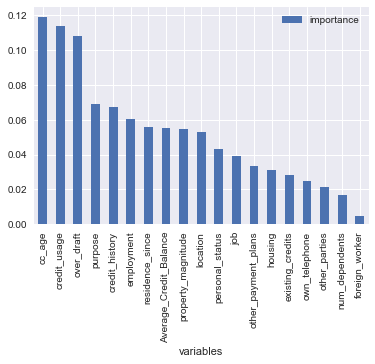

In [103]:
df_rf_imp.plot(kind="bar",x=df_rf_imp['variables'])

## Analysis taking only important variables observed after analysing through pivoting

In [104]:
train5 = train[['credit_history','employment','other_parties','property_magnitude','foreign_worker','class']]

In [105]:
test5 = test[['credit_history','employment','other_parties','property_magnitude','foreign_worker','class']]

In [106]:
X_train5 = train5.drop("class", axis=1)
Y_train5 = train5["class"]
X_test5  = test5.drop("class", axis=1)
Y_test5 = test5["class"]
X_train5.shape, Y_train5.shape, X_test5.shape, Y_test5.shape

((800, 5), (800,), (200, 5), (200,))

In [107]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train5, Y_train5)
Y_pred_log = logreg.predict(X_test5)
print(logreg.coef_)
print(logreg.intercept_)

[[-0.47340129 -0.11730596  0.15479774  0.08780774  0.86060665]]
[-0.41122628]


In [108]:
cm_log = pd.crosstab(Y_test5, Y_pred_log, rownames=['True'], colnames=['Predicted'], margins=True)
cm_log

Predicted,0,1,All
True,,,
0,136,0,136
1,57,7,64
All,193,7,200


In [109]:
cost_log = cm_log.iloc[1,0]*5 + cm_log.iloc[0,1]*1
cost_log

285

In [110]:
# Decision Tree

decision_tree = DecisionTreeClassifier(random_state=100)
decision_tree.fit(X_train5, Y_train5)
Y_pred_dec = decision_tree.predict(X_test5)

In [111]:
cm_dec = pd.crosstab(Y_test5, Y_pred_dec, rownames=['True'], colnames=['Predicted'], margins=True)
cm_dec

Predicted,0,1,All
True,,,
0,124,12,136
1,52,12,64
All,176,24,200


In [112]:
cost_dec = cm_dec.iloc[1,0]*5 + cm_dec.iloc[0,1]*1
cost_dec

272

In [113]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100,random_state=100)
random_forest.fit(X_train5, Y_train5)
Y_pred_ran = random_forest.predict(X_test5)

In [114]:
cm_ran = pd.crosstab(Y_test5, Y_pred_ran, rownames=['True'], colnames=['Predicted'], margins=True)
cm_ran

Predicted,0,1,All
True,,,
0,124,12,136
1,53,11,64
All,177,23,200


In [115]:
cost_ran = cm_ran.iloc[1,0]*5 + cm_ran.iloc[0,1]*1
cost_ran

277

## Taking only the important variables by random forest importance

In [116]:
train6 = train[['cc_age','credit_usage','over_draft','credit_history','purpose','employment','class']]

In [117]:
test6 = test[['cc_age','credit_usage','over_draft','credit_history','purpose','employment','class']]

In [118]:
X_train6 = train6.drop("class", axis=1)
Y_train6 = train6["class"]
X_test6  = test6.drop("class", axis=1)
Y_test6 = test6["class"]
X_train6.shape, Y_train6.shape, X_test6.shape, Y_test6.shape

((800, 6), (800,), (200, 6), (200,))

In [119]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train6, Y_train6)
Y_pred_lr = logreg.predict(X_test6)
print(logreg.coef_)
print(logreg.intercept_)

[[-0.00438449  0.03328231  0.30777117 -0.41111206  0.01304143 -0.10635997]]
[-0.44119755]


In [120]:
cm_lr = pd.crosstab(Y_test6, Y_pred_lr, rownames=['True'], colnames=['Predicted'], margins=True)
cm_lr

Predicted,0,1,All
True,,,
0,134,2,136
1,53,11,64
All,187,13,200


In [121]:
cost_lr = cm_lr.iloc[1,0]*5 + cm_lr.iloc[0,1]*1
cost_lr

267

In [122]:
# Decision Tree

decision_tree = DecisionTreeClassifier(random_state=100)
decision_tree.fit(X_train6, Y_train6)
Y_pred_dt = decision_tree.predict(X_test6)

In [123]:
cm_dt = pd.crosstab(Y_test6, Y_pred_dt, rownames=['True'], colnames=['Predicted'], margins=True)
cm_dt

Predicted,0,1,All
True,,,
0,105,31,136
1,24,40,64
All,129,71,200


In [124]:
cost_dt = cm_dt.iloc[1,0]*5 + cm_dt.iloc[0,1]*1
cost_dt

151

In [125]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100,random_state=100)
random_forest.fit(X_train6, Y_train6)
Y_pred_rf = random_forest.predict(X_test6)

In [126]:
cm_rf = pd.crosstab(Y_test6, Y_pred_rf, rownames=['True'], colnames=['Predicted'], margins=True)
cm_rf

Predicted,0,1,All
True,,,
0,128,8,136
1,31,33,64
All,159,41,200


In [127]:
cost_rf = cm_rf.iloc[1,0]*5 + cm_rf.iloc[0,1]*1
cost_rf

163

## Function for statistical analysis

In [128]:
def func (train_df,test_df):
    X_train_df = train_df.drop("class", axis=1)
    Y_train_df = train_df["class"]
    X_test_df  = test_df.drop("class", axis=1)
    Y_test_df = test_df["class"]
    # Logistic Regression
    logreg = LogisticRegression()
    logreg.fit(X_train_df, Y_train_df)
    Y_pred_log = logreg.predict(X_test_df)
    print("The coeficients of logistic regression line are:")
    print(logreg.coef_)
    print(" ")    
    print("The intercept for logistic regression line is:")
    print(logreg.intercept_)
    print(" ")    
    cm_lr = pd.crosstab(Y_test_df, Y_pred_log, rownames=['True'], colnames=['Predicted'], margins=True)
    print("Cost Matrix for Logistic Regression:")
    print(cm_lr)
    print(" ")
    cost_lr = cm_lr.iloc[1,0]*5 + cm_lr.iloc[0,1]*1
    print("The Cost for Lostic Regression Model is %2f"%cost_lr)
    print(" ")    
    # Decision Tree
    decision_tree = DecisionTreeClassifier(random_state=100)
    decision_tree.fit(X_train_df, Y_train_df)
    Y_pred_dec = decision_tree.predict(X_test_df)
    cm_dt = pd.crosstab(Y_test_df, Y_pred_dec, rownames=['True'], colnames=['Predicted'], margins=True)
    print("Cost Matrix for Decision Tree:")
    print(cm_dt)
    print(" ")    
    cost_dt = cm_dt.iloc[1,0]*5 + cm_dt.iloc[0,1]*1
    print("The Cost for Decision Tree Model is %2f"%cost_dt)
    print(" ")    
    # Random Forest
    random_forest = RandomForestClassifier(n_estimators=100,random_state=100)
    random_forest.fit(X_train_df, Y_train_df)
    Y_pred_ran = random_forest.predict(X_test_df)
    cm_rf = pd.crosstab(Y_test_df, Y_pred_ran, rownames=['True'], colnames=['Predicted'], margins=True)
    print("Cost Matrix for Random Forest:")
    print(cm_rf)
    print(" ")
    cost_rf = cm_rf.iloc[1,0]*5 + cm_rf.iloc[0,1]*1
    print("The Cost for Random Forest Model is %2f"%cost_rf)
    print(" ")
    importances = random_forest.feature_importances_
    df_rf_imp = pd.DataFrame(X_train_df.columns)
    df_rf_imp['importance'] = importances
    df_rf_imp.columns = ['variables','importance']
    df_rf_imp.sort_values(by='importance',ascending=False,inplace=True)
    print(df_rf_imp)
    df_rf_imp.plot(kind="bar",x=df_rf_imp['variables'])
    

The coeficients of logistic regression line are:
[[ 0.28463312  0.03377331 -0.43154865  0.01810301 -0.31258964 -0.14447055
   0.26291386  0.02705024  0.17809431  0.06469972 -0.03207267 -0.00972981
  -0.32597796  0.26655466  0.13763808 -0.02836999  0.16751143  0.19545118
   0.37313506]]
 
The intercept for logistic regression line is:
[-1.23402706]
 
Cost Matrix for Logistic Regression:
Predicted    0   1  All
True                   
0          132   4  136
1           44  20   64
All        176  24  200
 
The Cost for Lostic Regression Model is 224.000000
 
Cost Matrix for Decision Tree:
Predicted    0   1  All
True                   
0          108  28  136
1           36  28   64
All        144  56  200
 
The Cost for Decision Tree Model is 208.000000
 
Cost Matrix for Random Forest:
Predicted    0   1  All
True                   
0          125  11  136
1           38  26   64
All        163  37  200
 
The Cost for Random Forest Model is 201.000000
 
                 variables  impo

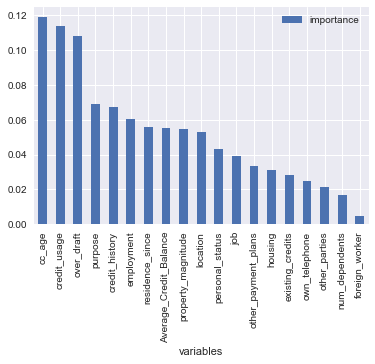

In [129]:
func(train,test)

The coeficients of logistic regression line are:
[[-0.47340129 -0.11730596  0.15479774  0.08780774  0.86060665]]
 
The intercept for logistic regression line is:
[-0.41122628]
 
Cost Matrix for Logistic Regression:
Predicted    0  1  All
True                  
0          136  0  136
1           57  7   64
All        193  7  200
 
The Cost for Lostic Regression Model is 285.000000
 
Cost Matrix for Decision Tree:
Predicted    0   1  All
True                   
0          124  12  136
1           52  12   64
All        176  24  200
 
The Cost for Decision Tree Model is 272.000000
 
Cost Matrix for Random Forest:
Predicted    0   1  All
True                   
0          124  12  136
1           53  11   64
All        177  23  200
 
The Cost for Random Forest Model is 277.000000
 
            variables  importance
0      credit_history    0.328187
1          employment    0.280878
3  property_magnitude    0.237069
2       other_parties    0.116458
4      foreign_worker    0.037407


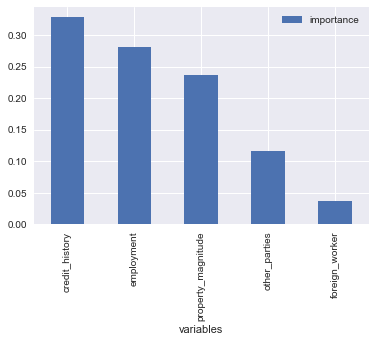

In [130]:
func(train5,test5)

The coeficients of logistic regression line are:
[[-0.00438449  0.03328231  0.30777117 -0.41111206  0.01304143 -0.10635997]]
 
The intercept for logistic regression line is:
[-0.44119755]
 
Cost Matrix for Logistic Regression:
Predicted    0   1  All
True                   
0          134   2  136
1           53  11   64
All        187  13  200
 
The Cost for Lostic Regression Model is 267.000000
 
Cost Matrix for Decision Tree:
Predicted    0   1  All
True                   
0          105  31  136
1           24  40   64
All        129  71  200
 
The Cost for Decision Tree Model is 151.000000
 
Cost Matrix for Random Forest:
Predicted    0   1  All
True                   
0          128   8  136
1           31  33   64
All        159  41  200
 
The Cost for Random Forest Model is 163.000000
 
        variables  importance
0          cc_age    0.283458
1    credit_usage    0.210315
2      over_draft    0.148709
4         purpose    0.141244
5      employment    0.115016
3  credit_hist

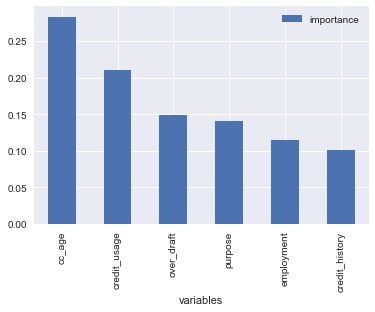

In [131]:
func(train6,test6)